In [1]:
from numpy import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

from tqdm import tqdm
from scipy.stats import ncf

Simulando: 100%|██████████| 4/4 [06:12<00:00, 93.05s/it] 


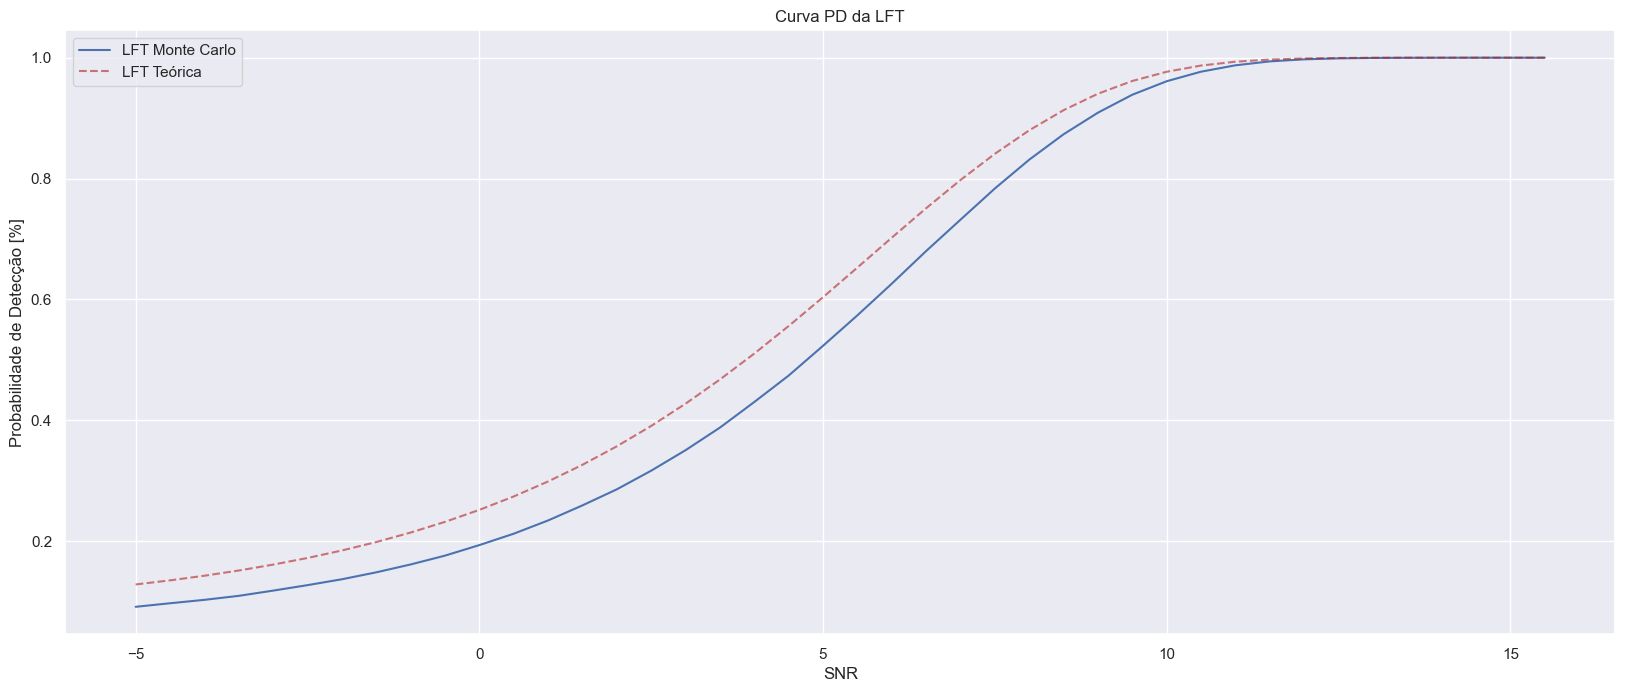

In [2]:
nSim = int(1e6) # num. de simulações (sen+ruido=>ord=>detecção?)
N = int(1e6) # num. de pontos na senóide
energia_ruido = 1

# listaSNRs = np.arange(-30,10,5)
listaSNRs = np.arange(-5,16,.5)
listaLs = [8,16,32,64]
probDetecLFT = np.zeros((len(listaSNRs),len(listaLs)))

for j in tqdm(range(0,len(listaLs)), desc = 'Simulando'):
    nd = 0

    for i in range(0,len(listaSNRs)):

        L = int(listaLs[j])
        limiar = ncf.ppf(1 -5/100, 2,2*L, 0)
        SNRi = listaSNRs[i]; 
        SNRd = 10**(SNRi/10)

        # Soma ruido aleatório novo à senóide inicial, em cada simulação:
        ruido = rd.randn(L,nSim) +1j*rd.randn(L,nSim)
        SINAL = np.sqrt(2*(energia_ruido**2)*SNRd) +rd.randn(1,nSim) +1j*rd.randn(1,nSim)

        # Calcula SFT na f0:
        ORD = (np.abs(SINAL)**2) / ((1/L)*(np.sum(np.abs(ruido)**2,axis=0)))

        probDetecLFT[i,j] = np.sum(ORD>limiar)/nSim
        # print('Probabilidade de detecção atingida:', (nd/nSim)*100,'\b%')


pDSFT = pd.DataFrame({'SNR': listaSNRs,'Probabilidade de Detecção [%]':probDetecLFT[:,0]})

sns.lineplot(data = pDSFT,x='SNR',y='Probabilidade de Detecção [%]');
ax = sns.lineplot(y=  1-ncf.cdf(limiar, 2,2*64,2*10**(listaSNRs/10)), x= listaSNRs,alpha = 0.6, color ='firebrick');
ax.lines[1].set_linestyle("--")
plt.title('Curva PD da LFT');
plt.legend(['LFT Monte Carlo','LFT Teórica'])

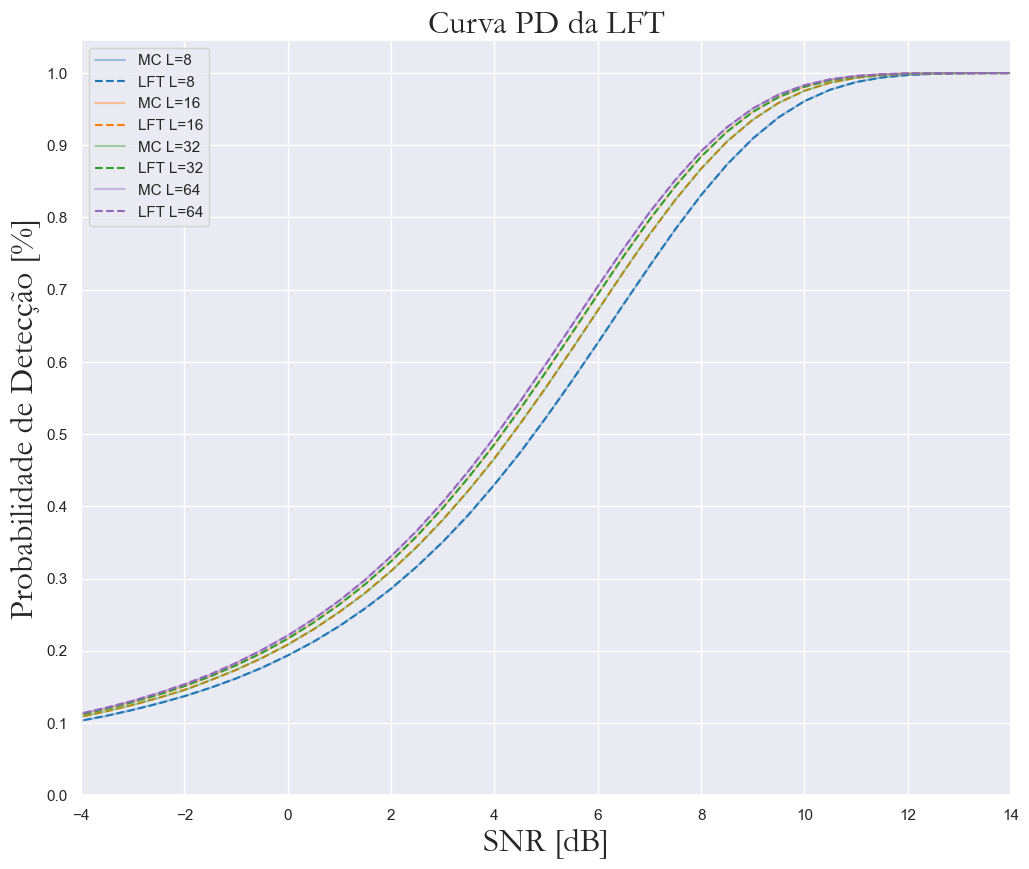

In [3]:
pDSFT8 = pd.DataFrame({'SNR': listaSNRs,'Probabilidade de Detecção [%]':probDetecLFT[:,0]})
pDSFT16 = pd.DataFrame({'SNR': listaSNRs,'Probabilidade de Detecção [%]':probDetecLFT[:,1]})
pDSFT32 = pd.DataFrame({'SNR': listaSNRs,'Probabilidade de Detecção [%]':probDetecLFT[:,2]})
pDSFT64 = pd.DataFrame({'SNR': listaSNRs,'Probabilidade de Detecção [%]':probDetecLFT[:,3]})

plt.rcParams['figure.figsize'] = [12, 10]

sns.lineplot(data = pDSFT8,x='SNR',y='Probabilidade de Detecção [%]', color = 'tab:blue',alpha = 0.4);
limiar = ncf.ppf(1 -5/100, 2,2*8, 0)
ax = sns.lineplot(y=  1-ncf.cdf(limiar, 2,2*8,2*10**(listaSNRs/10)), x= listaSNRs, color ='tab:blue');

sns.lineplot(data = pDSFT32,x='SNR',y='Probabilidade de Detecção [%]', color = 'tab:orange',alpha = 0.4);
limiar = ncf.ppf(1 -5/100, 2,2*16, 0)
ax = sns.lineplot(y=  1-ncf.cdf(limiar, 2,2*16,2*10**(listaSNRs/10)), x= listaSNRs, color ='tab:orange');

sns.lineplot(data = pDSFT16,x='SNR',y='Probabilidade de Detecção [%]', color = 'tab:green',alpha = 0.4);
limiar = ncf.ppf(1 -5/100, 2,2*32, 0)
ax = sns.lineplot(y=  1-ncf.cdf(limiar, 2,2*32,2*10**(listaSNRs/10)), x= listaSNRs, color ='tab:green');

sns.lineplot(data = pDSFT64,x='SNR',y='Probabilidade de Detecção [%]', color = 'tab:purple',alpha = 0.4);
limiar = ncf.ppf(1 -5/100, 2,2*64, 0)
ax = sns.lineplot(y=  1-ncf.cdf(limiar, 2,2*64,2*10**(listaSNRs/10)), x= listaSNRs, color ='tab:purple');

ax.lines[1].set_linestyle("--")
ax.lines[3].set_linestyle("--")
ax.lines[5].set_linestyle("--")
ax.lines[7].set_linestyle("--")

plt.xticks([-4,-2,0,2,4,6,8,10,12,14])
plt.xlim([-4,14])
plt.yticks(np.arange(0,1.1,0.1))

plt.title('Curva PD da LFT',fontsize=24, fontfamily='Garamond');
plt.ylabel('Probabilidade de Detecção [%]',fontsize=24, fontfamily='Garamond')
plt.xlabel('SNR [dB]',fontsize=24, fontfamily='Garamond')
plt.legend(['MC L=8','LFT L=8','MC L=16','LFT L=16','MC L=32','LFT L=32','MC L=64','LFT L=64'])

In [6]:
nSim = int(1e6) # num. de simulações (sen+ruido=>ord=>detecção?)
N = int(1e6) # num. de pontos na senóide

# Calcula senóide base e frequência para encontrar bins:
# L = 16; 
energia_ruido = 1
# 1/16


listaSNRs = np.arange(-20,10.5,.5)
# listaSNRs = np.arange(-30,6,5)
listaMs = [6,12,24,48]
probDetecLFT = np.zeros((len(listaSNRs),len(listaMs)))


for j in tqdm(range(0,len(listaMs)), desc = 'Simulando'):
    nd = 0

    for i in range(0,len(listaSNRs)):

        M = int(listaMs[j])
        limiar = 1-(5/100)**(1/(M-1))
        SNRi = listaSNRs[i]; 
        SNRd = 10**(SNRi/10)

        # Soma ruido aleatório novo à senóide inicial, em cada simulação:      
        SINAL = np.sqrt(2*(energia_ruido**2)*SNRd) +rd.randn(M,nSim) +1j*rd.randn(M,nSim)

        # Calcula SFT na f0:
        ORD = (np.abs(np.sum(SINAL,axis=0))**2) / (M*np.sum(np.abs(SINAL)**2,axis=0))


        probDetecLFT[i,j] = np.sum(ORD>limiar)/nSim

        # print('Probabilidade de detecção atingida:', (np.sum(ORD>limiar)/nSim)*100,'\b%')

Simulando: 100%|██████████| 4/4 [06:50<00:00, 102.54s/it]


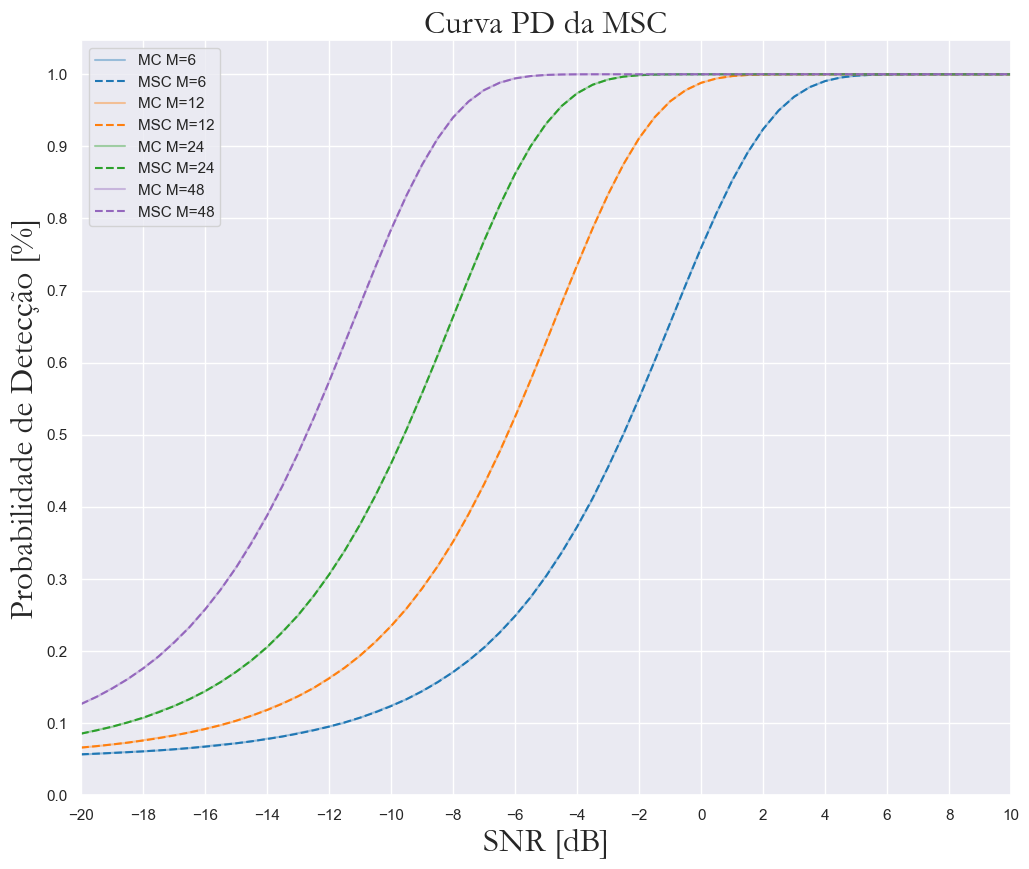

In [15]:
pDMSC6 = pd.DataFrame({'SNR': listaSNRs,'Probabilidade de Detecção [%]':probDetecLFT[:,0]})
pDMSC12 = pd.DataFrame({'SNR': listaSNRs,'Probabilidade de Detecção [%]':probDetecLFT[:,1]})
pDMSC24 = pd.DataFrame({'SNR': listaSNRs,'Probabilidade de Detecção [%]':probDetecLFT[:,2]})
pDMSC48 = pd.DataFrame({'SNR': listaSNRs,'Probabilidade de Detecção [%]':probDetecLFT[:,3]})

plt.rcParams['figure.figsize'] = [12, 10]

sns.lineplot(data = pDMSC6,x='SNR',y='Probabilidade de Detecção [%]', color = 'tab:blue',alpha = 0.4);
M = 6
MMSCcrit = 1-(5/100)**(1/(M-1)) # (M-1)*(MMSCcrit/(1-MMSCcrit))
limiar = (M-1)*(MMSCcrit/(1-MMSCcrit))
ax = sns.lineplot(y=  1-ncf.cdf(limiar, 2,2*(M-1),2*M*10**(listaSNRs/10)), x= listaSNRs, color ='tab:blue');

sns.lineplot(data = pDMSC12,x='SNR',y='Probabilidade de Detecção [%]', color = 'tab:orange',alpha = 0.4);
M = 12
MMSCcrit = 1-(5/100)**(1/(M-1)) # (M-1)*(MMSCcrit/(1-MMSCcrit))
limiar = (M-1)*(MMSCcrit/(1-MMSCcrit))
ax = sns.lineplot(y=  1-ncf.cdf(limiar, 2,2*(M-1),2*M*10**(listaSNRs/10)), x= listaSNRs, color ='tab:orange');

sns.lineplot(data = pDMSC24,x='SNR',y='Probabilidade de Detecção [%]', color = 'tab:green',alpha = 0.4);
M = 24
MMSCcrit = 1-(5/100)**(1/(M-1)) # (M-1)*(MMSCcrit/(1-MMSCcrit))
limiar = (M-1)*(MMSCcrit/(1-MMSCcrit))
ax = sns.lineplot(y=  1-ncf.cdf(limiar, 2,2*(M-1),2*M*10**(listaSNRs/10)), x= listaSNRs, color ='tab:green');

sns.lineplot(data = pDMSC48,x='SNR',y='Probabilidade de Detecção [%]', color = 'tab:purple',alpha = 0.4);
M = 48
MMSCcrit = 1-(5/100)**(1/(M-1)) # (M-1)*(MMSCcrit/(1-MMSCcrit))
limiar = (M-1)*(MMSCcrit/(1-MMSCcrit))
ax = sns.lineplot(y=  1-ncf.cdf(limiar, 2,2*(M-1),2*M*10**(listaSNRs/10)), x= listaSNRs, color ='tab:purple');

ax.lines[1].set_linestyle("--")
ax.lines[3].set_linestyle("--")
ax.lines[5].set_linestyle("--")
ax.lines[7].set_linestyle("--")

plt.xticks(np.arange(min(listaSNRs),max(listaSNRs)+2,2))
plt.xlim([-20,10])
plt.yticks(np.arange(0,1.1,0.1))

plt.title('Curva PD da MSC',fontsize=24, fontfamily='Garamond');
plt.ylabel('Probabilidade de Detecção [%]',fontsize=24, fontfamily='Garamond')
plt.xlabel('SNR [dB]',fontsize=24, fontfamily='Garamond')
plt.legend(['MC M=6','MSC M=6','MC M=12','MSC M=12','MC M=24','MSC M=24','MC M=48','MSC M=48'])

In [25]:
from __future__ import print_function, absolute_import

from numba import cuda
from numba.cuda.random import create_xoroshiro128p_states, xoroshiro128p_uniform_float32
import numpy as np

@cuda.jit
def compute_pi(rng_states, iterations, out):
    """Find the maximum value in values and store in result[0]"""
    thread_id = cuda.grid(1)

    # Compute pi by drawing random (x, y) points and finding what
    # fraction lie inside a unit circle
    inside = 0
    for i in range(iterations):
        x = xoroshiro128p_uniform_float32(rng_states, thread_id)
        y = xoroshiro128p_uniform_float32(rng_states, thread_id)
        if x**2 + y**2 <= 1.0:
            inside += 1

    out[thread_id] = 4.0 * inside / iterations

threads_per_block = 64
blocks = 24
rng_states = create_xoroshiro128p_states(threads_per_block * blocks, seed=1)
out = np.zeros(threads_per_block * blocks, dtype=np.float32)

compute_pi[blocks, threads_per_block](rng_states, 10000, out)
print('pi:', out.mean())

pi: 3.1416733


C:\Users\alexa\AppData\Local\Programs\Python\Python38\lib\site-packages\numba\cuda\cudadrv\devicearray.py:790: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


In [27]:
%%timeit
compute_pi[blocks, threads_per_block](rng_states, 10000, out)

3.52 ms ± 319 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
from numba import cuda
from numba.cuda.random import create_xoroshiro128p_states, xoroshiro128p_uniform_float32

@cuda.jit
def simulaLFT_GPU(N,rng_states, iterations, out):
    ruido1 = []
    ruido2 = []
    for _ in range(0,N):
        ruido1.append(xoroshiro128p_uniform_float32(rng_states, thread_id))
        ruido2.append(xoroshiro128p_uniform_float32((rng_states, thread_id)))
    return np.sqrt(2) +ruido1 +1j*ruido2

def simulaLFT(N):
    return np.sqrt(2) +rd.randn(1,N) +1j*rd.randn(1,N)


    # nSim = int(N) # num. de simulações (sen+ruido=>ord=>detecção?)
    # N = int(N) # num. de pontos na senóide
    # energia_ruido = 1

    # # listaSNRs = np.arange(-30,10,5)
    # listaSNRs = np.arange(-5,16,.5)
    # listaLs = [8,16,32,64]
    # probDetecLFT = np.zeros((len(listaSNRs),len(listaLs)))

    # for j in tqdm(range(0,len(listaLs)), desc = 'Simulando'):
    #     nd = 0

    #     for i in range(0,len(listaSNRs)):

    #         L = int(listaLs[j])
    #         limiar = ncf.ppf(1 -5/100, 2,2*L, 0)
    #         SNRi = listaSNRs[i]; 
    #         SNRd = 10**(SNRi/10)

    #         # Soma ruido aleatório novo à senóide inicial, em cada simulação:
    #         ruido = rd.randn(L,nSim) +1j*rd.randn(L,nSim)
    #         SINAL = np.sqrt(2*(energia_ruido**2)*SNRd) +rd.randn(1,nSim) +1j*rd.randn(1,nSim)

    #         # Calcula SFT na f0:
    #         ORD = (np.abs(SINAL)**2) / ((1/L)*(np.sum(np.abs(ruido)**2,axis=0)))

    #         probDetecLFT[i,j] = np.sum(ORD>limiar)/nSim
    #         # print('Probabilidade de detecção atingida:', (nd/nSim)*100,'\b%')


    # pDSFT = pd.DataFrame({'SNR': listaSNRs,'Probabilidade de Detecção [%]':probDetecLFT[:,0]})

    # sns.lineplot(data = pDSFT,x='SNR',y='Probabilidade de Detecção [%]');
    # ax = sns.lineplot(y=  1-ncf.cdf(limiar, 2,2*64,2*10**(listaSNRs/10)), x= listaSNRs,alpha = 0.6, color ='firebrick');
    # ax.lines[1].set_linestyle("--")
    # plt.title('Curva PD da LFT');
    # plt.legend(['LFT Monte Carlo','LFT Teórica'])
    # return probDetecLFT

threads_per_block = 64
blocks = 24
rng_states = create_xoroshiro128p_states(threads_per_block * blocks, seed=1)
out = np.zeros(threads_per_block * blocks, dtype=np.float32)